# do the CUC particles go through the JdF canyon??? 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, animation
import xarray as xr
import numpy as np
import pandas as pd
import cmocean as cm
from datetime import datetime
from IPython.display import HTML
import netCDF4 as nc

In [12]:
#load in grid for plotting the bathy
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

In [48]:
run = xr.open_dataset('/data1/bbeutel/LO_user/ariane/test/qual_20170802/ariane_trajectories_qualitative.nc')

/tmp/ipykernel_231205/339254369.py:3: UserWarning: linewidths is ignored by contourf
  ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')


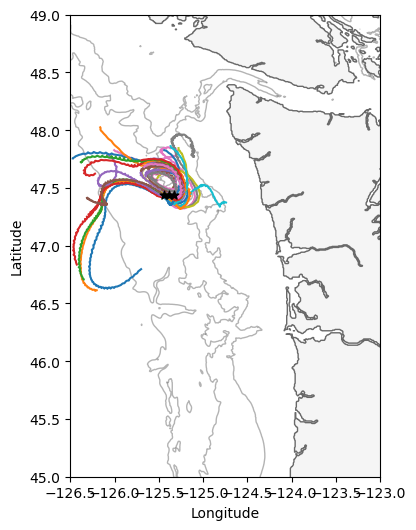

In [49]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([45,49])
ax.set_xlim([-126.5,-123])

# plot trajectories
ax.plot(run.traj_lon, run.traj_lat)

# plot points for initial postions
ax.scatter([grid.lon_rho[706,210],grid.lon_rho[706,215],grid.lon_rho[706,220]],[grid.lat_rho[706,210],grid.lat_rho[706,215],grid.lat_rho[706,220]], c='k',marker='*',s=40,zorder=3)

/tmp/ipykernel_231205/15692035.py:8: UserWarning: linewidths is ignored by contourf
  ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')


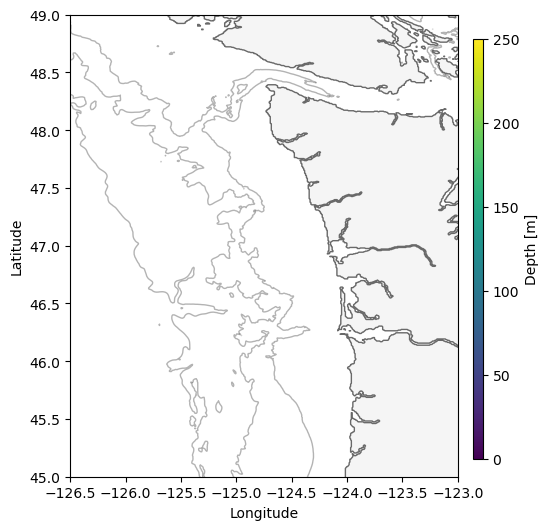

In [53]:
#lets animate may for the summer and feb for the winter
# file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30jun17/ariane_trajectories_qualitative.nc')

# Make initial animation figure
fig, ax = plt.subplots(figsize=(5, 6))
cax = fig.add_axes([0.93, 0.14, 0.02, 0.7])

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([45,49])
ax.set_xlim([-126.5,-123])

l = ax.scatter([], [], s=50, c=[], vmin=0, vmax=250, edgecolor='k')
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
fig.colorbar(l, cax=cax, orientation='vertical',label='Depth [m]')


# Init function
def init():
    t.set_text('')
    # l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([run.traj_lon[hour,:], run.traj_lat[hour,:]]).T)
    l.set_array(run.traj_depth[hour,:])
    return l, t,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(run.nb_output)-1, interval=50, blit=True)


In [54]:
HTML(anim.to_html5_video())

In [55]:
(run.traj_depth[0,:])

<xarray.DataArray 'traj_depth' (ntraj: 27)>
array([131.383049, 161.825214, 196.359677, 133.038711, 163.869695, 198.845825,
       130.286867, 160.46948 , 194.709115, 130.287327, 160.754236, 195.316771,
       131.944898, 162.800581, 197.804731, 129.193403, 159.400711, 193.66836 ,
       130.140899, 160.611115, 195.177401, 131.805581, 162.66441 , 197.67213 ,
       129.051996, 159.262497, 193.533769])
Dimensions without coordinates: ntraj
Attributes:
    title:     What is traj_depth ?
    longname:  Trajectory: z positions
    units:     No dimension